In [12]:
using DataFrames
using Gadfly
set_default_plot_size(30cm, 12cm)
home = "/home/german/labo/18/lbp/run"

"/home/german/labo/18/lbp/run"

In [133]:
function get_pnum(in_vec::Array{Float64, 1})
    in_vec = in_vec ./ norm(in_vec) 
    return convert(Int64, round(sum(in_vec .^ 4) .^ -1))
end

get_pnum (generic function with 1 method)

In [6]:
function tognm(vtor_anm)
    vtor_gnm = Array{Float64}(convert(Int64, length(vtor_anm)/3));
    vtor_anm =  vtor_anm.^2
    for i=1:convert(Int64, length(vtor_anm)/3)
        vtor_gnm[i] = sqrt(vtor_anm[i*3-2] + vtor_anm[i*3-1] + vtor_anm[i*3])
    end
    return vtor_gnm
end

tognm (generic function with 1 method)

In [ ]:
function dist_mode(freq::Float64)
    # Declaro cte de boltzmann, avogadro, y temperatura.
    Kb = 1.38064852e-23
    A = 6.0221409e+23
    T = 298
    AKbT = A * Kb * T
    
    return d^2 * 0.5 * KBT * evals.^2 / cte # KJ/mol
end

In [ ]:
function energia_gdte(evals::Array{Float64, 1}, gdte::Array{Float64, 1}, d::Float64 = 1.)

    if length(evals) != length(gdte)
        error("Lengths of evals and gdte don't match. Aborting.") 
    end
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831
    
    return d^2 * 0.5 * KBT * sum(evals.^2 .* gdte.^2) / cte # KJ/mol
end

In [ ]:
function energia_modes(evals::Array{Float64, 1}, d::Float64 = 1.)
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831

    return d^2 * 0.5 * KBT * sum(evals.^2) / cte # KJ/mol
end

In [ ]:
function E_modes_wvgv(evals::Array{Float64, 1}, gdte::Array{Float64, 1}, d::Float64 = 1.)

    if length(evals) != length(gdte)
        error("Lengths of evals and gdte don't match. Aborting.") 
    end
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831
    
    return d^2 * 0.5 * KBT * (evals.^2 .* gdte.^2) / cte # KJ/mol
end

In [ ]:
function E_modes(evals::Array{Float64, 1}, d::Float64 = 1.)
    
    # Declaro cte de boltzmann, avogadro, y temperatura.
    KB = 1.38064852e-23
    avgdro = 6.0221409e+23
    T = 298
    KBT = 0.593 # 
    cte = 11792.08316093831
    
    return d^2 * 0.5 * KBT * evals.^2 / cte # KJ/mol
end

In [5]:
function read_ptraj_modes(filename, nmodes::Int64=0, norma::Bool=true)
    modes_text = readdlm(filename, skipstart=0, skipblanks=true, comments=true,
        comment_char='\*')

    if nmodes == 0
        nmodes = modes_text[1, 5]
    end
    modes_elements = modes_text[2, 1]

    ncoords = convert(Int64, modes_elements)
    lines = ceil(Int64, ncoords/7)
    rest = convert(Int64, ncoords % 7)

    eval = Array{Float64}(nmodes);
    mode = Array{Float64}(ncoords, nmodes);
    temp1 = Array{Float64}(ncoords, 1);
    temp2 = Array{Float64}(ncoords+(7-rest));

    j=lines + 1 + 2 # 1 p/ q lea la prox linea 2 por el header
    for i=1:nmodes
        eval[i] = modes_text[j, 2]
        temp = permutedims(modes_text[(j+1):(lines+j), :], [2, 1])
        temp2 = reshape(temp, ncoords+(7-rest))
        for k=(rest+1):7
            pop!(temp2)
        end
        mode[:, i] = temp2
        j = j + lines + 1
    end

    if norma == true
        for i=1:nmodes
            mode[: ,i] = mode[:, i] / norm(mode[:, i])
        end
    end

    return mode, eval
end

read_ptraj_modes (generic function with 3 methods)

### Lee modos, volumen original y  volúmenes NDD.
### Obtiene VGV

In [66]:
pdb_list = [ "1ael" ; "1ure" ; "4uet" ; "4xcp" ]

# Leo modos
for each in pdb_list
    sym_mode = Symbol("modes_", each)
    sym_eval = Symbol("evals_", each)
    tmp_mode, tmp_eval = read_ptraj_modes(joinpath(home, each,  "pca", string("full_modes_", each)))
    eval(:($sym_mode = $tmp_mode))
    eval(:($sym_eval = $tmp_eval))
end

# Leo volúmenes originales
for each in pdb_list
    sym_vol = Symbol("vol_avg_", each)
    tmp_vol = convert(Float64,
        readdlm(joinpath(home, each,  "ndd", string("vol_avg_", each)))[3])
    eval(:($sym_vol = $tmp_vol))
end

# Leo volúmenes NDD
for each in pdb_list
    sym_ndd_out = Symbol("ndd_out_", each)
    tmp_ndd_out = convert(Array{Float64, 1},
        readdlm(joinpath(home, each,  "ndd", string("out_ndd_", each)))[2:end, 2])
    eval(:($sym_ndd_out = $tmp_ndd_out))
end

# VGV
# 1AEL
tmp_vgv = ndd_out_1ael .- vol_avg_1ael
vgv_1ael = tmp_vgv ./ norm(tmp_vgv)
# 1URE
tmp_vgv = ndd_out_1ure .- vol_avg_1ure
vgv_1ure = tmp_vgv ./ norm(tmp_vgv)
# 4UET
tmp_vgv = ndd_out_4uet .- vol_avg_4uet
vgv_4uet = tmp_vgv ./ norm(tmp_vgv)
# 4XCP
tmp_vgv = ndd_out_4xcp .- vol_avg_4xcp
vgv_4xcp = tmp_vgv ./ norm(tmp_vgv);

### Obtiene los pnum modos y pnum eigenvals

In [169]:
# Obtengo pnum de los VGV
for each in pdb_list
    # Pnumber
    sym_pnu = Symbol("pnu_", each)
    sym_vgv = Symbol("vgv_", each)
    tmp_pnu = eval(:(get_pnum($sym_vgv)))
    eval(:($sym_pnu = $tmp_pnu))
    
    # Pnumber indices
    sym_idx = Symbol("idx_pnu_", each)
    eval(:($sym_idx = sortperm(abs.($sym_vgv), rev=true)[1:$tmp_pnu]))
    
    # Pnumber modes
    sym_modes = Symbol("modes_", each)
    sym_pnu_modes = Symbol("pnu_modes_", each)
    eval(:($sym_pnu_modes = $sym_modes[:, $sym_idx]))
    
    # Pnumber eigenvalues
    sym_evals = Symbol("evals_", each)
    sym_pnu_evals = Symbol("pnu_evals_", each)
    eval(:($sym_pnu_evals = $sym_evals[$sym_idx]))
    
    # VGV cartesiano
    sym_xyz_vgv = Symbol("xyz_vgv_", each)
    eval(:($sym_xyz_vgv = $sym_modes * $sym_vgv))
    
    # Pnumber aminoácidos según VGV (aminoácidos de la pared)
    sym_aa_pnu_ = Symbol("aa_pnu_", each)
    eval(:($sym_aa_pnu_ = get_pnum($sym_xyz_vgv)))
    
    # Índices de pnumber aminoácidos
    sym_idx_pnu_aa = Symbol("idx_pnu_aa_", each)
    eval(:($sym_idx_pnu_aa = sortperm(abs.($sym_xyz_vgv), rev = true)[1:$sym_aa_pnu_]))
    
    # Modos recortados según pnumber aminoácidos
    sym_pnu_modes_pnu_aa = Symbol("pnu_modes_pnu_aa_", each)
    eval(:($sym_pnu_modes_pnu_aa = $sym_pnu_modes[$sym_idx_pnu_aa, :]))
    # Normalizo
    eval(:($sym_pnu_modes_pnu_aa = mapslices(x -> x ./ norm(x), $sym_pnu_modes_pnu_aa, 1)))
end

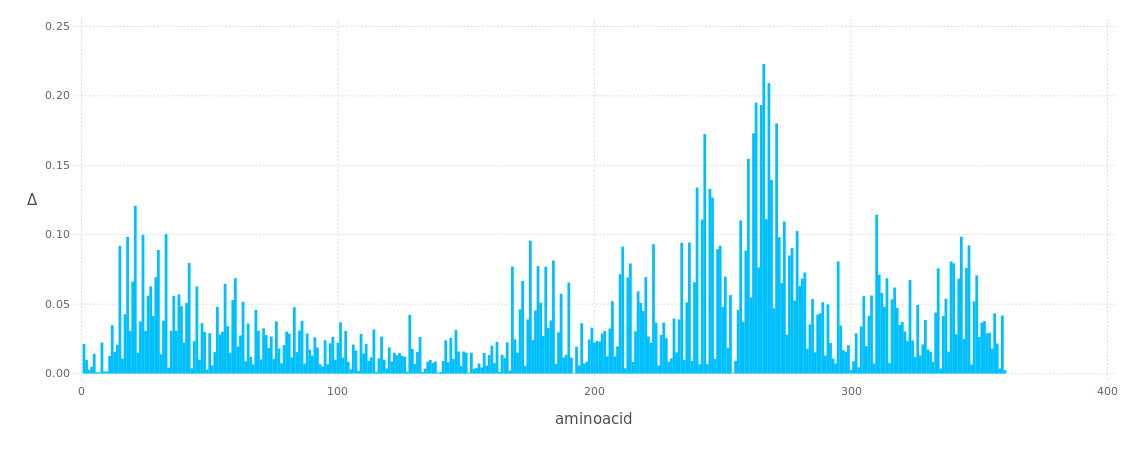

In [128]:
df_xyz_vgv_1ael = DataFrame(Δ = abs.(xyz_vgv_1ael), aminoacid = collect(1:length(xyz_vgv_1ael)));

pdf_xyz_vgv_1ael = plot(df_xyz_vgv_1ael, y = "Δ", x = "aminoacid",
    Geom.bar)

In [173]:
norm(pnu_modes_pnu_aa_1ael[:, 2])

1.0

In [168]:
norm(trmp[:, 1])

0.9999999999999999

In [ ]:
# Colectividad de modos enteros
κ = exp(-mapslices(x -> sum(x), mapslices(x->x.^2 .* log(x.^2), modes_prt_1, 1), 1)) ./
    size(modes_prt)[1]
κ = reshape(κ, size(modes_prt)[2])

### Según frecuencia

In [ ]:
# Calculo 3 histogramas por las dudas, pero solo gráfico  df_mode_freq_Whis

# Los bins van de 0 a la fqcia más alta + 10%
top_freq = maximum(evals_prt_pnum) * 1.1
bins_freq = collect(0:50:top_freq)
unos_freq = repeat([1.0], inner=[length(evals_prt_pnum)])

# Histograma no ponderado
mode_freq_his, mode_freq_bins = WeightedHist(evals_prt_pnum, bins_freq, unos_freq, true);
df_mode_freq_pnum_his = DataFrame(Probability = mode_freq_his, Frequency = mode_freq_bins);

# Histograma ponderado
mode_freq_Whis, mode_freq_Wbins = WeightedHist(evals_prt_pnum, bins_freq, abs(gdte_whole_pnum), true);
df_mode_freq_pnum_Whis = DataFrame(Probability = mode_freq_Whis, Frequency = mode_freq_Wbins);

# Histograma ponderado y dividido por densidad de estados
mode_freq_Whis_state_dens = mode_freq_Whis ./ mode_freq_his
# Fix some NaNs caused by "divide by zero" error
mode_freq_Whis_state_dens[isnan(mode_freq_Whis_state_dens)] = 0
# Turn to density
mode_freq_Whis_state_dens = mode_freq_Whis_state_dens ./ sum(mode_freq_Whis_state_dens)
df_mode_freq_pnum_Whis_state_dens = DataFrame(Probability = mode_freq_Whis_state_dens, Frequency = mode_freq_Wbins);

### Según pnumber

In [ ]:
# Calculo 3 histogramas por las dudas, pero solo gráfico  df_mode_pn_pnum_his

# Los bins van de 0 al pnumber más alto + 10%
top_pn_a = maximum(pn_modes_prt_pnum) * 1.1
top_pn_whole_a = maximum(pn_modes_prt_whole_pnum) * 1.1
bins_pn_a = collect(0:0.05:top_pn_a)
bins_pn_whole_a = collect(0:0.05:top_pn_whole_a)
unos_pn = repeat([1.0], inner=[length(pn_modes_prt_pnum)])

# Pnumber de modos enteros

# Histograma no ponderado
mode_pn_his, mode_pn_bins = WeightedHist(pn_modes_prt_pnum, bins_pn_a, unos_pn, true);
df_mode_pn_pnum_his = DataFrame(Probability = mode_pn_his, Pnumber = mode_pn_bins);

# Histograma por colectividad de modo
mode_pn_Whis, mode_pn_Wbins = WeightedHist(pn_modes_prt_pnum, bins_pn_a, abs(gdte_whole_pnum), true);
df_mode_pn_pnum_Whis = DataFrame(Probability = mode_pn_Whis, Pnumber = mode_pn_Wbins);

# Histograma ponderado y dividido por densidad de estados
mode_pn_Whis_state_dens = mode_pn_Whis ./ mode_pn_his
# Fix some NaNs caused by "divide by zero" error
mode_pn_Whis_state_dens[isnan(mode_pn_Whis_state_dens)] = 0
# Turn to density
mode_pn_Whis_state_dens = mode_pn_Whis_state_dens ./ sum(mode_pn_Whis_state_dens)
df_mode_pn_pnum_Whis_state_dens = DataFrame(Probability = mode_pn_Whis_state_dens,
    Pnumber = mode_pn_Wbins);


# Pnumber de modos recortados

# Histograma no ponderado
mode_pn_whole_his, mode_pn_whole_bins = WeightedHist(pn_modes_prt_whole_pnum, bins_pn_whole_a, unos_pn, true);
df_mode_pn_whole_pnum_his = DataFrame(Probability = mode_pn_whole_his, Pnumber = mode_pn_whole_bins);

# Histograma por colectividad de modo
mode_pn_whole_Whis, mode_pn_whole_Wbins = WeightedHist(pn_modes_prt_whole_pnum, bins_pn_whole_a, abs(gdte_whole_pnum), true);
df_mode_pn_whole_pnum_Whis = DataFrame(Probability = mode_pn_whole_Whis, Pnumber = mode_pn_whole_Wbins);

# Histograma ponderado y dividido por densidad de estados
mode_pn_whole_Whis_state_dens = mode_pn_whole_Whis ./ mode_pn_whole_his
# Fix some NaNs caused by "divide by zero" error
mode_pn_whole_Whis_state_dens[isnan(mode_pn_whole_Whis_state_dens)] = 0
# Turn to density
mode_pn_whole_pnum_Whis_state_dens = mode_pn_whole_Whis_state_dens ./ sum(mode_pn_whole_Whis_state_dens)
df_mode_pn_whole_Whis_state_dens = DataFrame(Probability = mode_pn_whole_Whis_state_dens,
    Pnumber = mode_pn_whole_Wbins);

### Según colectividad

In [ ]:
# Calculo 3 histogramas por las dudas, pero solo gráfico  df_mode_κ_pnum_his

# Los bins van de 0 al valor del elemento más alto del gradiente + 10%
top_κ_pnum = maximum(κ_pnum) * 1.1
top_κ_whole_pnum = maximum(κ_whole_pnum) * 1.1 
bins_κ_pnum = collect(0:0.05:top_κ_pnum)
bins_κ_whole_pnum = collect(0:0.05:top_κ_whole_pnum)
unos_κ_pnum = repeat([1.0], inner=[length(κ_pnum)])

# Colectividad de modos enteros

# Histograma no ponderado
mode_κ_pnum_his, mode_κ_pnum_bins = WeightedHist(κ_pnum, bins_κ_pnum, unos_κ_pnum, true);
df_mode_κ_pnum_his = DataFrame(Probability = mode_κ_pnum_his, Collectivity = mode_κ_pnum_bins);

# Histograma por colectividad de modo
mode_κ_pnum_Whis, mode_κ_pnum_Wbins = WeightedHist(κ_pnum, bins_κ_pnum, abs(gdte_whole_pnum), true);
df_mode_κ_pnum_Whis = DataFrame(Probability = mode_κ_pnum_Whis, Collectivity = mode_κ_pnum_Wbins);

# Histograma ponderado y dividido por densidad de estados
mode_κ_pnum_Whis_state_dens = mode_κ_pnum_Whis ./ mode_κ_pnum_his
# Fix some NaNs caused by "divide by zero" error
mode_κ_pnum_Whis_state_dens[isnan(mode_κ_pnum_Whis_state_dens)] = 0
# Turn to density
mode_κ_pnum_Whis_state_dens = mode_κ_pnum_Whis_state_dens ./ sum(mode_κ_pnum_Whis_state_dens)
df_mode_κ_pnum_Whis_state_dens = DataFrame(Probability = mode_κ_pnum_Whis_state_dens,
    Collectivity = mode_κ_pnum_Wbins);


# Colectividad de modos recortados

# Histograma no ponderado
mode_κ_whole_pnum_his, mode_κ_whole_pnum_bins = WeightedHist(κ_whole_pnum, bins_κ_whole_pnum, unos_κ_pnum, true); 
df_mode_κ_whole_pnum_his = DataFrame(Probability = mode_κ_whole_pnum_his, Collectivity = mode_κ_whole_pnum_bins);

# Histograma por colectividad de modo
mode_κ_whole_pnum_Whis, mode_κ_whole_pnum_Wbins = WeightedHist(κ_whole_pnum, bins_κ_whole_pnum, abs(gdte_whole_pnum), true);
df_mode_κ_whole_pnum_Whis = DataFrame(Probability = mode_κ_whole_pnum_Whis, Collectivity = mode_κ_whole_pnum_Wbins);

# Histograma ponderado y dividido por densidad de estados
mode_κ_whole_pnum_Whis_state_dens = mode_κ_whole_pnum_Whis ./ mode_κ_whole_pnum_his
# Fix some NaNs caused by "divide by zero" error
mode_κ_whole_pnum_Whis_state_dens[isnan(mode_κ_whole_pnum_Whis_state_dens)] = 0
# Turn to density
mode_κ_whole_pnum_Whis_state_dens = mode_κ_whole_pnum_Whis_state_dens ./ sum(mode_κ_whole_pnum_Whis_state_dens)
df_mode_κ_whole_pnum_Whis_state_dens = DataFrame(Probability = mode_κ_whole_pnum_Whis_state_dens,
    Collectivity = mode_κ_whole_pnum_Wbins);